<a href="https://colab.research.google.com/github/solobala/ABD26/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка PySpark

In [ ]:
!apt-get update > /dev/null

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [5]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

In [6]:
!tar -xf spark-3.3.1-bin-hadoop3.tgz

In [7]:
!pip install -q findspark

In [9]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [10]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

## Работа с RDD

In [11]:
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark",
   "hadoop", 
   "pyspark",
   "bigdata",
    "python"]
)

In [12]:
words

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274

In [13]:
words.count()

10

In [14]:
def mapper(w):
  return (w, 1)

In [15]:
words.map(mapper)

PythonRDD[2] at RDD at PythonRDD.scala:53

In [ ]:
transform = words.map(mapper)

In [ ]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 1),
 ('spark', 1),
 ('akka', 1),
 ('spark', 1),
 ('hadoop', 1),
 ('pyspark', 1),
 ('bigdata', 1),
 ('python', 1)]

In [16]:
def reducer(a, b):
  return a + b

In [ ]:
transform.reduceByKey(reducer)

In [ ]:
transform = transform.reduceByKey(reducer)

In [ ]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 2),
 ('akka', 1),
 ('bigdata', 1),
 ('python', 1),
 ('spark', 2),
 ('pyspark', 1)]

In [17]:
# Можно все эти операции в 1 строку сделать
words.map(mapper).reduceByKey(reducer).collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 2),
 ('akka', 1),
 ('bigdata', 1),
 ('python', 1),
 ('spark', 2),
 ('pyspark', 1)]

## DataFrame

In [27]:
df = spark.read.csv('/content/power.csv', inferSchema=True, header=True)

In [ ]:
## Обзор

In [28]:
df.count()

177793

In [29]:
df.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [31]:
df.take(5)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1),
 Row(country='Belgium', year=2014, quantity=0.0, category=1),
 Row(country='Belgium', year=2013, quantity=0.0, category=1),
 Row(country='Belgium', year=2012, quantity=35.0, category=1)]

## Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [46]:
df_practice = spark.read.csv('/content/transactions.csv', inferSchema=True, header=True)

In [47]:
df_practice.take(10)

[Row(Year=2017, Month=1, ID='t001', Product='A1', Amount=7, Price=2904, Total=20328, Cost=1200),
 Row(Year=2017, Month=1, ID='t002', Product='A2', Amount=2, Price=1896, Total=3792, Cost=1100),
 Row(Year=2017, Month=2, ID='t003', Product='A1', Amount=5, Price=2904, Total=14520, Cost=1200),
 Row(Year=2017, Month=2, ID='t004', Product='A4', Amount=1, Price=8618, Total=8618, Cost=4200),
 Row(Year=2017, Month=2, ID='t005', Product='A5', Amount=3, Price=5175, Total=15525, Cost=500),
 Row(Year=2017, Month=2, ID='t006', Product='_6', Amount=4, Price=3500, Total=14000, Cost=200),
 Row(Year=2017, Month=3, ID='t007', Product='_3', Amount=6, Price=1265, Total=7590, Cost=200),
 Row(Year=2017, Month=3, ID='t008', Product='_5', Amount=2, Price=5175, Total=10350, Cost=1200),
 Row(Year=2017, Month=4, ID='t009', Product='_8', Amount=3, Price=3760, Total=11280, Cost=1000),
 Row(Year=2017, Month=4, ID='t010', Product='_4', Amount=2, Price=8618, Total=17236, Cost=3400)]

In [ ]:
# Выборки

In [35]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.take(1)

[Row(country='Austria', year=1996, quantity=5.0)]

In [36]:
df_lim = df_lim.withColumnRenamed('year', 'y')
df_lim

DataFrame[country: string, y: int, quantity: double]

In [37]:
df_lim.columns

['country', 'y', 'quantity']

In [38]:
## Описание и статистики

In [39]:
df_lim.show()

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [40]:
df_lim.describe().show()

+-------+-----------+------------------+--------------------+
|summary|    country|                 y|            quantity|
+-------+-----------+------------------+--------------------+
|  count|     177793|            177793|              177793|
|   mean|       null|2003.0083917814536|  225577.33097561405|
| stddev|       null| 7.212666047854287|1.6272125582676353E7|
|    min|Afghanistan|              1990|            -35779.0|
|    max|   Zimbabwe|              2014|             3.257E9|
+-------+-----------+------------------+--------------------+



In [ ]:
## Сохранение - сохраняет в сессионное хранилище

In [41]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

In [ ]:
## Вычисления

In [ ]:
df_lim = df_lim.withColumn('quantity x 2', df_lim['quantity'] * 2)

In [ ]:
df_grp = df_lim.groupBy('country')

In [ ]:
df_sum = df_grp.sum('quantity', 'quantity x 2')

In [ ]:
df_sum.show()

+------------------+--------------------+--------------------+
|           country|       sum(quantity)|   sum(quantity x 2)|
+------------------+--------------------+--------------------+
|     Côte d'Ivoire| 2.815485732456253E7| 5.630971464912506E7|
|              Chad|  3796498.7491319943|   7592997.498263989|
|          Paraguay|     1.23209483765E7|      2.4641896753E7|
|          Anguilla|   20529.34999999997|   41058.69999999994|
|             Yemen|1.8178937740390217E8|3.6357875480780435E8|
|State of Palestine|  1318668.0123446316|   2637336.024689263|
|           Senegal|   6944395.348079733|1.3888790696159465E7|
|            Sweden|1.3456236759933385E8| 2.691247351986677E8|
|        Cabo Verde|   88130.27080000004|  176260.54160000008|
|          Kiribati|   6450.091429000002|  12900.182858000004|
|            Guyana|   772150.6722661877|  1544301.3445323755|
|       Philippines|  8.45277094530091E7| 1.690554189060182E8|
|           Eritrea|   918454.1476713057|  1836908.2953

In [42]:
## Сводные таблицы

In [43]:
df_lim.groupby('country').pivot('y').sum('quantity').show()

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|           country|              1990|              1991|              1992|              1993|              1994|              1995|              1996|              1997|              1998|              1999|              2000|              2001|              2002|              2003|              2004|              2005|              2006|              2007|              2008|              2009|              2010|              2011|              2012|              2013|              2014|
+-------

## Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [51]:
df_pr_max = df_practice.groupBy('Product').max('Amount')
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [52]:
df_pr_min = df_practice.groupBy('Product').min('Amount')
df_pr_min.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [92]:
df_pr_avg = df_practice.groupBy('Product').avg('Amount')
df_pr_avg.show()

+-------+------------------+
|Product|       avg(Amount)|
+-------+------------------+
|     _5|3.5454545454545454|
|     _2|              4.75|
|     A2|               2.0|
|     _8|               3.5|
|     _3| 4.285714285714286|
|     _4|               2.0|
|     _6|               4.0|
|     A4|               2.0|
|     A5|               4.0|
|     A1|               5.6|
+-------+------------------+



In [ ]:
## Подвыборки

In [53]:
df['quantity'] > 184264

Column<'(quantity > 184264)'>

In [54]:
df.where((df['quantity'] > 184264)).show()

+-------------+----+--------+--------+
|      country|year|quantity|category|
+-------------+----+--------+--------+
|United States|2014|367987.0|       2|
|United States|2013|384439.0|       2|
|United States|2012|370625.0|       2|
|United States|2011|310909.0|       2|
|United States|2010|335418.0|       2|
|United States|2009|230589.0|       2|
|United States|2008|226570.0|       2|
|United States|2007|221771.0|       2|
|United States|2005|314655.0|       2|
|United States|2004|243916.0|       2|
|United States|1996|226319.0|       2|
|United States|1995|292568.0|       2|
|United States|1994|230254.0|       2|
|United States|1993|247909.0|       2|
|United States|2014|448216.0|       2|
|United States|2013|458711.0|       2|
|United States|2012|433505.0|       2|
|United States|2011|382566.0|       2|
|United States|2010|406606.0|       2|
|United States|2009|296903.0|       2|
+-------------+----+--------+--------+
only showing top 20 rows



In [ ]:
df_filter = df.where((df['quantity'] > 184264) & (df['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
| Canada|2013|191861.0|      10|
| Canada|2007|202060.0|      10|
| Canada|2006|203142.0|      10|
| Canada|2005|224001.0|      10|
| Canada|2004|236803.0|      10|
| Canada|2003|226291.0|      10|
+-------+----+--------+--------+
only showing top 20 rows



# Практика 3. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук


In [99]:
df_pr_max.where(df_pr_max['max(Amount)']>5).orderBy('max(Amount)').limit(3).show()



+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _3|          7|
|     A5|          7|
+-------+-----------+



## SQL

In [ ]:
df.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [76]:
df.createOrReplaceTempView('power')

In [77]:
spark.sql('SELECT * FROM power').show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [94]:
spark.sql('SELECT country, sum(quantity) FROM power GROUP BY country').orderBy('sum(quantity)').show()

+--------------------+------------------+
|             country|     sum(quantity)|
+--------------------+------------------+
|St. Helena and De...|               0.0|
|Bonaire, St Eusta...|1.8000000000000005|
|Sint Maarten (Dut...|1.8000000000000005|
|                Niue|1.9139999999999928|
|          Seychelles|3.6820000000000004|
|Pacific Islands (...|               4.0|
|             Andorra| 4.877999999999994|
|           Gibraltar| 6.059999999999999|
|British Virgin Is...| 8.945999999999993|
|Turks and Caicos ...|            13.128|
|             Bermuda| 18.25200000000004|
|Falkland Is. (Mal...| 19.15799999999998|
| St. Pierre-Miquelon|              22.0|
|             Mayotte|28.467999999999986|
|Micronesia (Fed. ...|30.899999999999995|
|               Palau|              46.0|
|            Dominica| 50.74399999999999|
|             Vanuatu| 63.82199999999998|
|           St. Lucia| 79.70400000000018|
|               Tonga| 95.30799999999995|
+--------------------+------------

In [79]:
## Соединение
from pyspark.sql import Row

In [80]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [83]:
type(row1) #объект pyspark.sql тип Row

pyspark.sql.types.Row

Создаем RDD из Row1 и Row2

In [85]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),    
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),    
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [86]:
df1.show()

+------+-----+-----+
|  name|  pet|count|
+------+-----+-----+
|   Sue|  cat|   16|
|   Kim|  dog|    1|
|   Bob| fish|    5|
|Libuse|horse|    1|
+------+-----+-----+



In [87]:
df2.show()

+---------+------+------+
|     name|  pet2|count2|
+---------+------+------+
|      Sue| eagle|     2|
|      Kim|   ant|   179|
|      Bob|lizard|     5|
|Ferdinand|  bees|    23|
+---------+------+------+



In [89]:
df1.join(df2, 'name', how='inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
| Sue| cat|   16| eagle|     2|
+----+----+-----+------+------+



In [88]:
df1.join(df2, 'name', how='left').show()

+------+-----+-----+------+------+
|  name|  pet|count|  pet2|count2|
+------+-----+-----+------+------+
|   Sue|  cat|   16| eagle|     2|
|   Kim|  dog|    1|   ant|   179|
|   Bob| fish|    5|lizard|     5|
|Libuse|horse|    1|  null|  null|
+------+-----+-----+------+------+



In [90]:
df1.join(df2, 'name', how='right').show()

+---------+----+-----+------+------+
|     name| pet|count|  pet2|count2|
+---------+----+-----+------+------+
|      Sue| cat|   16| eagle|     2|
|      Kim| dog|    1|   ant|   179|
|Ferdinand|null| null|  bees|    23|
|      Bob|fish|    5|lizard|     5|
+---------+----+-----+------+------+



In [91]:
df1.join(df2, 'name', how='outer').show()

+---------+-----+-----+------+------+
|     name|  pet|count|  pet2|count2|
+---------+-----+-----+------+------+
|      Bob| fish|    5|lizard|     5|
|Ferdinand| null| null|  bees|    23|
|      Kim|  dog|    1|   ant|   179|
|   Libuse|horse|    1|  null|  null|
|      Sue|  cat|   16| eagle|     2|
+---------+-----+-----+------+------+



## Практика 4. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [93]:
df_pr_min.join(df_pr_max, 'Product', how ='inner').join(df_pr_avg, 'Product', how ='inner').show()

+-------+-----------+-----------+------------------+
|Product|min(Amount)|max(Amount)|       avg(Amount)|
+-------+-----------+-----------+------------------+
|     _5|          1|          6|3.5454545454545454|
|     _2|          1|          8|              4.75|
|     A2|          2|          2|               2.0|
|     _8|          1|         10|               3.5|
|     _3|          2|          7| 4.285714285714286|
|     _4|          1|          3|               2.0|
|     _6|          4|          4|               4.0|
|     A4|          1|          3|               2.0|
|     A5|          2|          7|               4.0|
|     A1|          2|          9|               5.6|
+-------+-----------+-----------+------------------+



## Визуализация

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
to_show = df.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+--------------------+
|year|       sum(quantity)|
+----+--------------------+
|1990|2.781426135733307E10|
|1991| 2.466541930678139E9|
|1992|2.1419483655120907E9|
|1993|1.818040678302332...|
|1994| 2.286637409479232E9|
|1995|1.8993733981039996E9|
|1996| 1.276732195368936E9|
|1997|2.368193080700125...|
|1998| 8.729463830731297E9|
|1999| 7.766232101772736E9|
|2000| 7.004882006062636E9|
|2001|4.0475256363267155E9|
|2002| 3.812004491308077E9|
|2003| 1.407111379702272E9|
|2004|1.4498832309942997E9|
|2005|1.623457574857694...|
|2006|1.5714035023136258E9|
|2007| 9.477595462966421E9|
|2008|1.288885727194202...|
|2009|1.6234129606657305E9|
+----+--------------------+
only showing top 20 rows



In [ ]:
pd_df = to_show.toPandas()

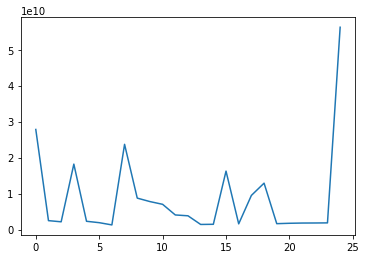

In [ ]:
pd_df['sum(quantity)'].plot()

In [ ]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

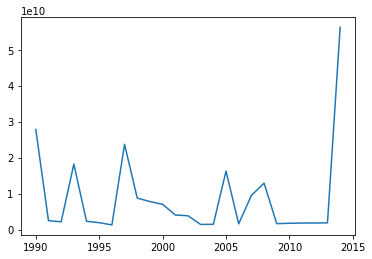

In [ ]:
plt.figure()
plt.plot(years, sums)
plt.show()

# Домашнее задание
- Скачайте dataset iris https://drive.google.com/file/d/18ksAxTxBkp15LToEg46BHhwp3sPIoeUU/view?usp=sharing
- Решите домашнее задание - https://colab.research.google.com/drive/1bFOzJNdQzITORtur_m0utqfDJ0QbGe7D?usp=sharing